# Analisi dati per l'esperienza di Michelson

in realtà l'analisi dati si potrebbe fare anche in excel ma è brutto come la francia quindi no.

### Import librerie

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

import scienceplots

plt.style.use(["science", "grid", "ieee"])

### Import dati

In [10]:
lambda_data = (
    pd.read_excel("Dati_raccolti.xlsx", sheet_name="Export_lambda")
    .dropna()
    .T.to_numpy()
)
n_a_data = (
    pd.read_excel("Dati_raccolti.xlsx", sheet_name="Export_n").dropna().T.to_numpy()
)
white_data = (
    pd.read_excel("Dati_raccolti.xlsx", sheet_name="Export_white").dropna().T.to_numpy()
)
sodio_data = (
    pd.read_excel("Dati_raccolti.xlsx", sheet_name="Export_Na").dropna().T.to_numpy()
)

### Misura di $\lambda$

In [11]:
dx = lambda_data[1] - lambda_data[0]
N1 = lambda_data[2]

del lambda_data

# ! da togliere
dx = np.random.normal(loc=4, size=(5))
N1 = 10 * np.random.normal(loc=100, size=(5))


def calc_lambda(n: float = 1.0) -> np.ndarray[float]:
    return 2 * n * np.divide(dx, N1)


def calc_lambda_err(lambdas: np.ndarray[float]) -> Tuple[float, float]:
    return np.average(lambdas, weights=[2 * np.divide(dx / N1)])

### Misura di $n_a$

In [12]:
N2 = n_a_data[0, :]
D = n_a_data[1, 0]

del n_a_data

# ! da togliere
D = 10
N1 = 5 * np.random.normal(loc=50, size=(5))


def calc_refraction_index(lambdas: np.ndarray[float]) -> np.ndarray[float]:
    return 1 + np.multiply(N2, lambdas) / (2 * D)

### Sistema lineare in $\lambda$ e $n_a$

calcolo con le medie

In [13]:
def sis_lineare_medie(
    mN1=np.mean(N1), mN2=np.mean(N2), mdx=np.mean(dx)
) -> Tuple[float]:
    return mN1 * D / (mN1 * D - mdx * mN2), 2 * mdx * D / (mN1 * D - mdx * mN2)


sis_lineare_medie()

(np.float64(1.0), np.float64(0.027682735921612356))

calcolo con l'orgia di N

[245.85292397 248.45327165 247.09378537 248.0739896  246.41896983] [4.85076977 3.16135629 3.79818365 3.30777629 1.98836296]
(np.float64(245.85292396709605), np.float64(4.85076976850052))
(np.float64(248.4532716459825), np.float64(3.1613562929107832))
(np.float64(247.0937853746757), np.float64(3.7981836464453806))
(np.float64(248.07398960177693), np.float64(3.307776285024506))
(np.float64(246.4189698278312), np.float64(1.9883629555982303))
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]] [[0.03946074 0.03946074 0.03946074 0.03946074 0.03946074 0.03946074
  0.03946074 0.03946074 0.03946074]
 [0.0254483  0.0254483  0.0254483  0.0254483  0.0254483  0.0254483
  0.0254483  0.0254483  0.0254483 ]
 [0.03074285 0.03074285 0.03074285 0.03074285 0.03074285 0.03074285
  0.03074285 0.03074285 0.03074285]
 [0.02666766 0.02666766 0.02666766 0.02666766 0.02666766 0.02666766
  0.02666766 0.02666766 0.0

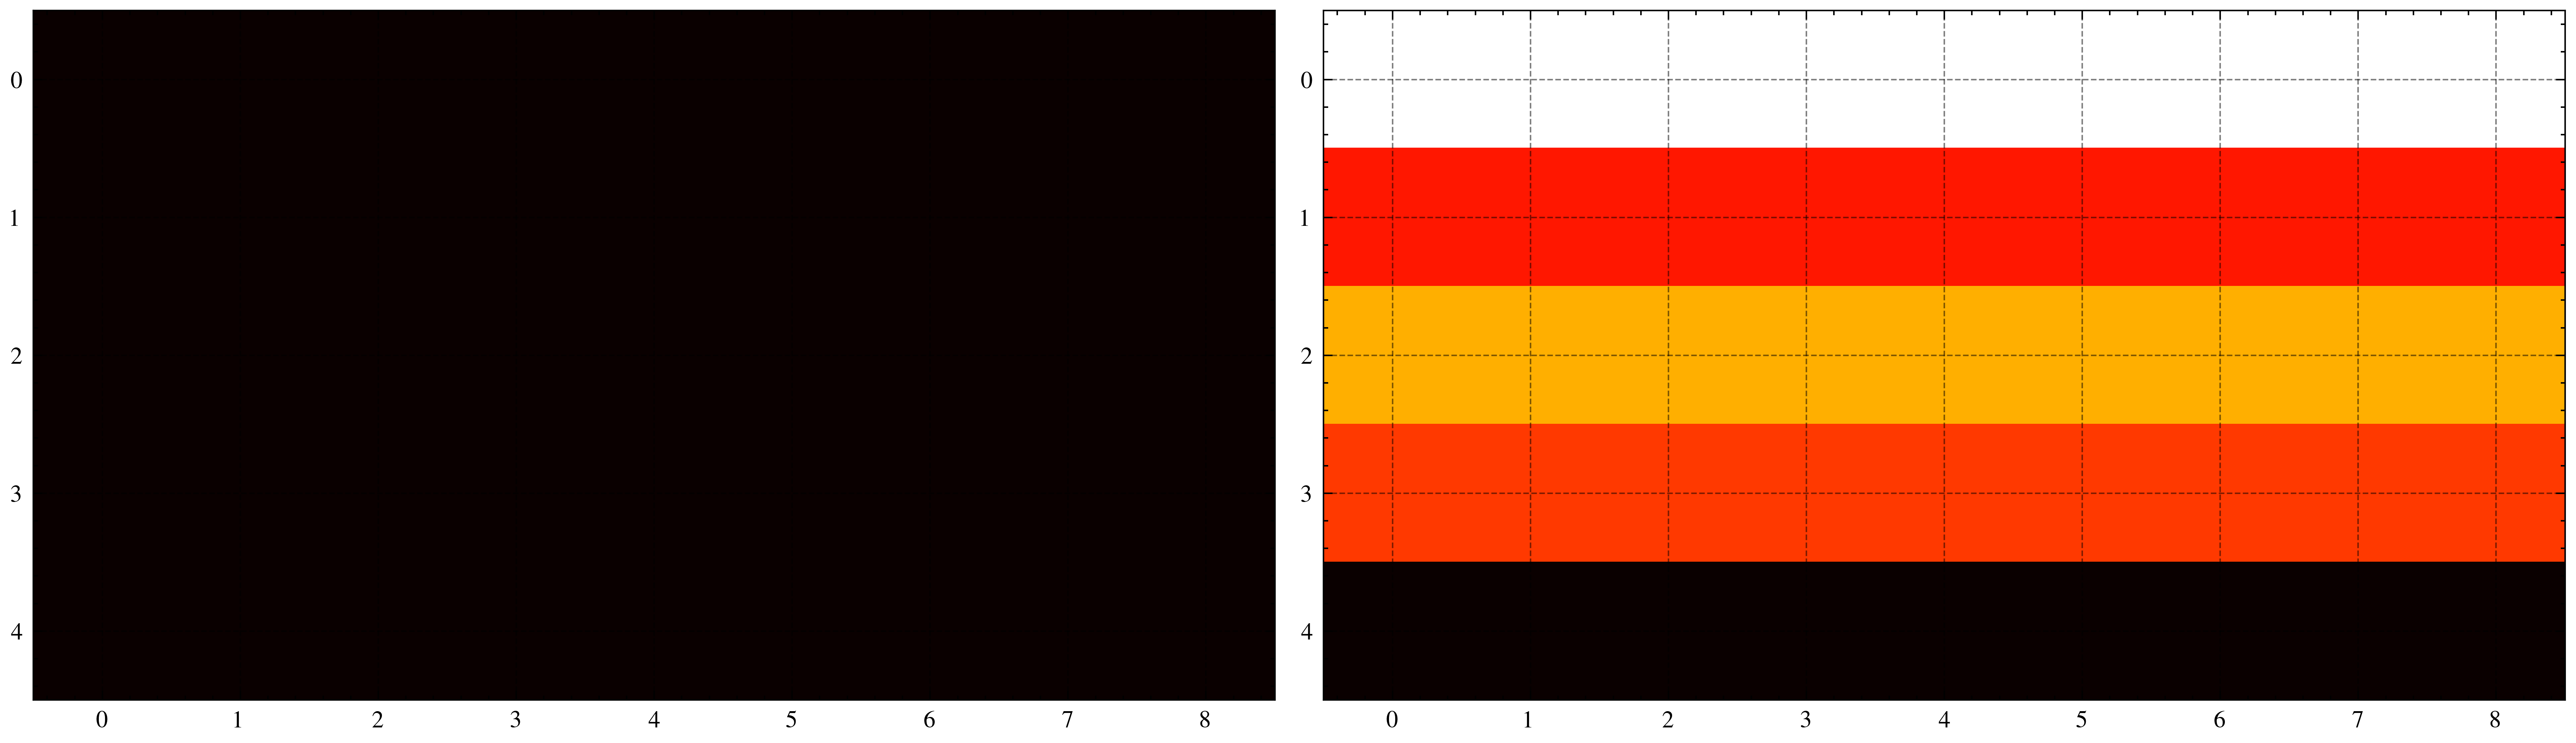

In [14]:
def sis_lineare_heatmap() -> np.ndarray[float, float]:
    M_lambda = np.zeros((len(N1), len(N2)))
    M_n_a = np.zeros((len(N1), len(N2)))

    print(N1, dx)

    for i, i_zip in enumerate(zip(N1, dx)):
        i_N1, i_dx = i_zip
        print(i_zip)  # ! da togliere
        for j, j_N2 in enumerate(N2):
            M_lambda[i, j], M_n_a[i, j] = sis_lineare_medie(
                mN1=i_N1, mN2=j_N2, mdx=i_dx
            )

    print(M_lambda, M_n_a)  # ! da togliere

    fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
    ax1, ax2 = axes
    ax1.imshow(M_lambda, cmap="hot")
    ax2.imshow(M_n_a, cmap="hot")
    plt.tight_layout()
    plt.show()

    return


sis_lineare_heatmap()

confronto tra i lambda e n_a iniziali e quelli calcolati dal sistema

### Misura dei treni d'onda

In [15]:
# dx = white_data[1, :] - white_data[0, :]

del white_data

### Misura della separazione del doppietto del sodio

In [16]:
# dx = sodio_data[2, :] - sodio_data[1, :]
m = sodio_data[0, :]

del sodio_data